# Pymaceuticals Inc.
---

### Analysis

- The data highlights a focus on the Capomulin and Ramicane regimens, with balanced gender distribution among mice. Mice weights range from 15g to 30g, and ages span 1 to 24 months, providing a diverse sample for analyzing tumor progression and treatment efficacy.
 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [125]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [127]:
# Display the first 5 rows of mouse metadata
print("Mouse Metadata:")
print(mouse_metadata.head())

# Display the first 5 rows of study results
print("\nStudy Results:")
print(study_results.head())

Mouse Metadata:
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

Study Results:
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [129]:
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [131]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print(num_mice)

249


In [133]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate data
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()[0]
print(f"Duplicate Mouse ID: {duplicate_mouse_id}")

# Create a clean DataFrame by removing all data associated with the duplicate Mouse ID
clean_data = merged_data[merged_data['Mouse ID'] != duplicate_mouse_id]

# Confirm the clean DataFrame
print(f"Number of unique mice after removal: {clean_data['Mouse ID'].nunique()}")
clean_data.head()

Duplicate Mouse ID: g989
Number of unique mice after removal: 248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [137]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data['Mouse ID'].nunique()
print(num_clean_mice)

248


## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group the data by Drug Regimen
regimen_group = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': regimen_group.mean(),
    'Median Tumor Volume': regimen_group.median(),
    'Tumor Volume Variance': regimen_group.var(),
    'Tumor Volume Std. Dev.': regimen_group.std(),
    'Tumor Volume SEM': regimen_group.sem()
})

# Display the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics table
summary_stats_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

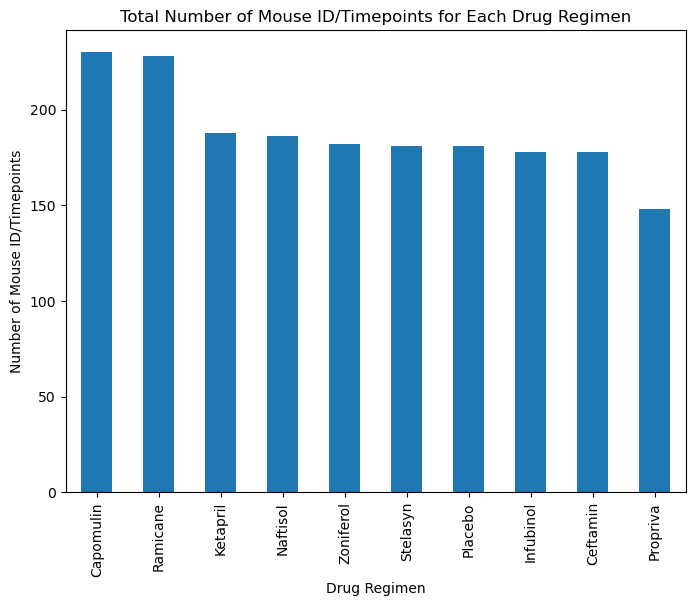

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the total number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(8,6))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.show()

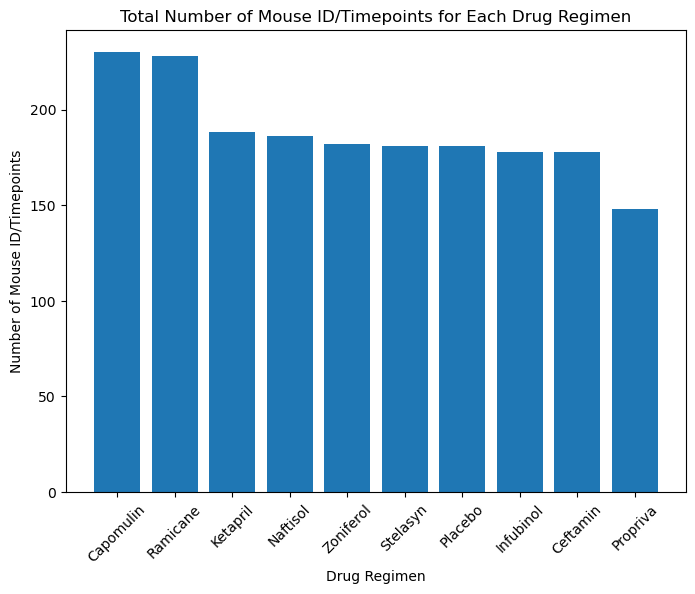

In [147]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's Pyplot
plt.figure(figsize=(8,6))
plt.bar(regimen_counts.index, regimen_counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


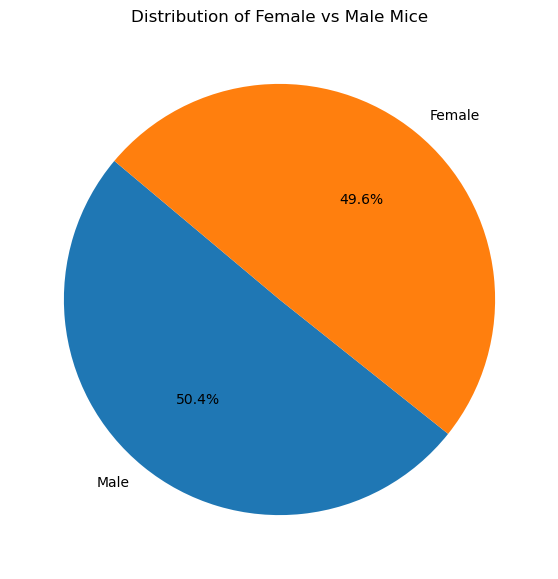

In [149]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender using drop_duplicates
unique_mice_gender = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Calculate the distribution of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7,7))

# Add title and formatting
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('') 
plt.show()


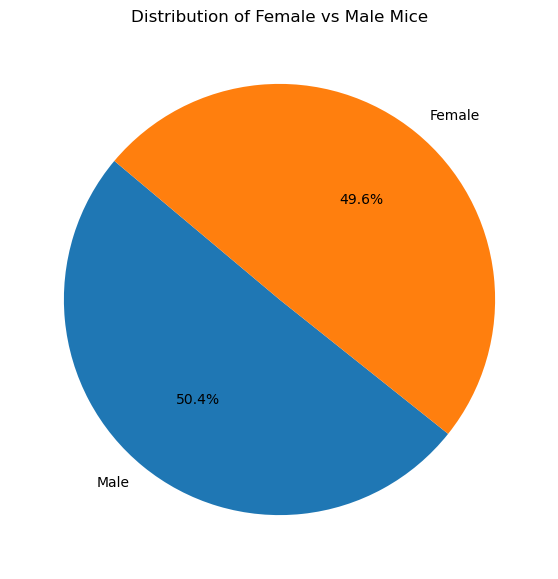

In [151]:
# Get the unique mice with their gender using drop_duplicates
unique_mice_gender = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Calculate the distribution of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Create the pie chart using Pyplot
plt.figure(figsize=(7, 7))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [154]:
# Get the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge to get the tumor volume at the last timepoint
final_tumor_volume = max_timepoint.merge(clean_data, on=['Mouse ID', 'Timepoint'])

# Filter for the four specified treatment regimens
filtered_data = final_tumor_volume[
    final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
]

# Display the final tumor volumes
print(filtered_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
..       ...          ...        ...                 ...
238     y769     Ceftamin         45           68.594745
239     y793    Capomulin         45           31.896238
240     y865     Ceftamin         45           64.729837
244     z578     Ramicane         45           30.638696
245     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [156]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get their tumor volumes
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor volume data
    tumor_volume_data.append(subset)
    
    # Calculate the IQR
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"{treatment}: Potential Outliers -> {outliers}")


Capomulin: Potential Outliers -> Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Potential Outliers -> Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: Potential Outliers -> 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Potential Outliers -> Series([], Name: Tumor Volume (mm3), dtype: float64)


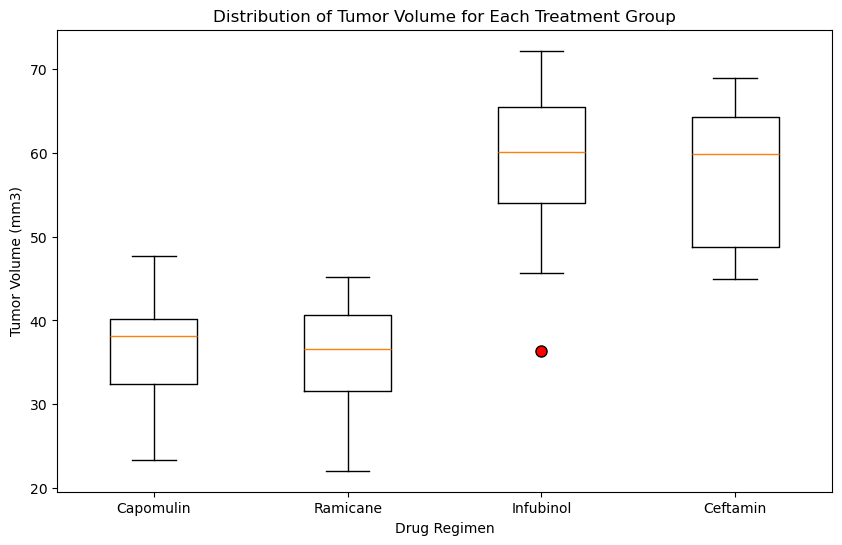

In [158]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to hold the tumor volume data for each treatment
tumor_data = []

for treatment in treatments:
    tumor_data.append(
        final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    )

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

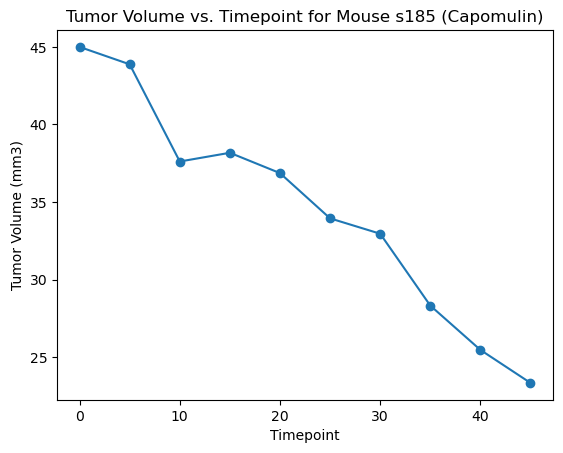

In [161]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_data = []

# Select a single mouse treated with Capomulin
mouse_id = 's185'  # Replace with the ID of your mouse
mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

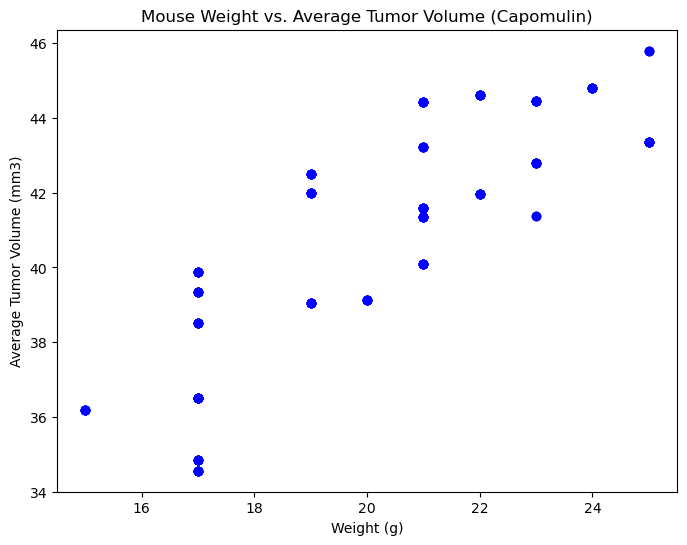

In [163]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_volume_data = []
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.columns = ['Mouse ID', 'Average Tumor Volume']

# Merge the average tumor volume with mouse metadata to include mouse weight
final_data = pd.merge(average_tumor_volume, clean_data, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_data['Weight (g)'], final_data['Average Tumor Volume'], color='b', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.83


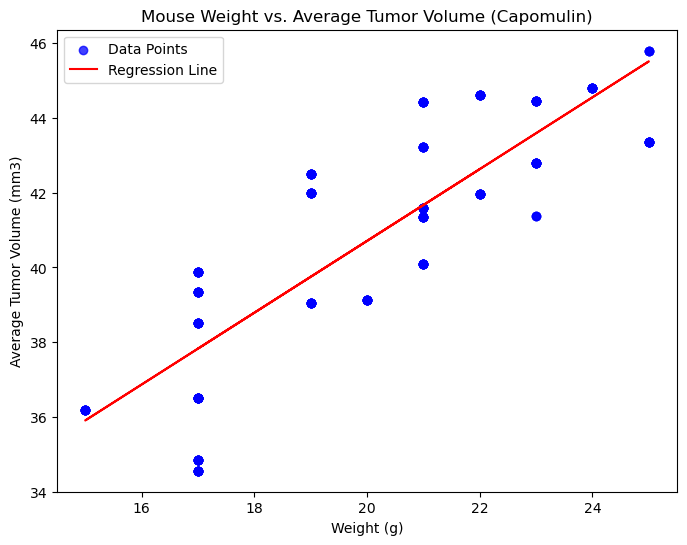

In [166]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.columns = ['Mouse ID', 'Average Tumor Volume']

# Merge with metadata to include weight
final_data = pd.merge(average_tumor_volume, clean_data, on='Mouse ID')

# Extract mouse weight and average tumor volume
x = final_data['Weight (g)']
y = final_data['Average Tumor Volume']

# Calculate the correlation coefficient
correlation = x.corr(y)
print(f"Correlation Coefficient: {correlation:.2f}")

# Perform manual linear regression using NumPy
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', alpha=0.75, label='Data Points')
plt.plot(x, slope * x + intercept, color='r', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()